In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#Загружаем и объединяем данные 

In [11]:
registration = pd.read_csv('/home/jupyter-s.blinov-9/shared/problem1-reg_data.csv', sep = ';')
date = pd.read_csv('/home/jupyter-s.blinov-9/shared/problem1-auth_data.csv', sep = ';')
full_data = registration.merge(date, on = 'uid')

#часть датафрейма для проверки функции
full_data = full_data.iloc[9582240:]


In [12]:
def retention(data):
# переводим дату из unix формата в обычный
# для определения retention по дням нам нужен такой формат даты: год - месяц - день
# избавляемся от секунд и минут, оставляем только год - месяц - день
    data['cohort'] = pd.to_datetime(data['reg_ts'], unit='s')\
                        .dt.strftime('%Y-%m-%d')\
                        .apply(pd.to_datetime)
# проделываем ту же самую оперерацию, что и с датой регистрации    
    data['auth_date'] = pd.to_datetime(data['auth_ts'], unit='s')\
                        .dt.strftime('%Y-%m-%d')\
                        .apply(pd.to_datetime)
# определяем сколько раз пользователь пользовался приложением после регистраци   
    data['days'] = (data.auth_date - data.cohort).dt.days
#создаем когорты для каждой группы (объединяем по дате регистрации)   
    cohort_counts = data.groupby(['cohort', 'days'])['uid'].size()\
                        .reset_index()\
                        .pivot(index='cohort', columns='days', values='uid')
# переводим таблицу в проценты, чтобы наглядно было видно какой процент пользователй вернулся в приложение через n-дней
    base  = cohort_counts[0]
    retention = cohort_counts.divide(base, axis=0).round(3)
#строим график
    sns.set(rc={'figure.figsize':(20,6)}, style = "whitegrid")
    plt.title('Retention Table')
    ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
    ax.set_yticklabels(retention.index)
    fig=ax.get_figure()
    fig.savefig("Retention_Rate.png")

    plt.show()

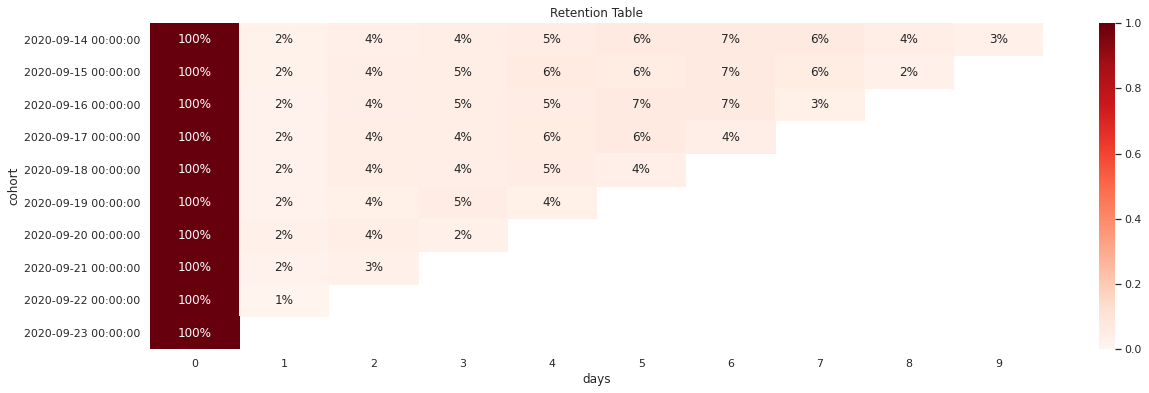

In [13]:
retention(full_data)

In [14]:
full_data['reg_date'] = pd.to_datetime(full_data['reg_ts'], unit='s')
full_data['auth_date'] = pd.to_datetime(full_data['auth_ts'], unit='s')

In [99]:
full_data = full_data[['uid', 'reg_date', 'auth_date']]

In [100]:
full_data = full_data[full_data.reg_date >= '2020-09-14']

In [81]:
full_data['reg_date'] = full_data['reg_date'].dt.strftime('%Y-%m-%d')
full_data['auth_date'] = full_data['auth_date'].dt.strftime('%Y-%m-%d')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
full_data[['reg_date', 'auth_date']] = full_data[['reg_date', 'auth_date']].apply(pd.to_datetime)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [93]:
full_data['days'] = (full_data.auth_date - full_data.reg_date).dt.days

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
full_data

uid   reg_date  auth_date  seniority
9582240  1093127 2020-09-14 2020-09-14          0
9582241  1093128 2020-09-14 2020-09-14          0
9582242  1093129 2020-09-14 2020-09-14          0
9582243  1093130 2020-09-14 2020-09-14          0
9582244  1093131 2020-09-14 2020-09-14          0
...          ...        ...        ...        ...
9601008  1110618 2020-09-23 2020-09-23          0
9601009  1110619 2020-09-23 2020-09-23          0
9601010  1110620 2020-09-23 2020-09-23          0
9601011  1110621 2020-09-23 2020-09-23          0
9601012  1110622 2020-09-23 2020-09-23          0

[18773 rows x 4 columns]

In [84]:
group = full_data.groupby(['reg_date', 'days'])
cohort_data = group['uid'].size()
cohort_data = cohort_data.reset_index()
cohort_data

reg_date  seniority   uid
0  2020-09-14          0  1619
1  2020-09-14          1    36
2  2020-09-14          2    62
3  2020-09-14          3    73
4  2020-09-14          4    86
5  2020-09-14          5   105
6  2020-09-14          6   113
7  2020-09-14          7   102
8  2020-09-14          8    72
9  2020-09-14          9    47
10 2020-09-15          0  1623
11 2020-09-15          1    36
12 2020-09-15          2    66
13 2020-09-15          3    74
14 2020-09-15          4    98
15 2020-09-15          5    91
16 2020-09-15          6   112
17 2020-09-15          7    92
18 2020-09-15          8    40
19 2020-09-16          0  1625
20 2020-09-16          1    31
21 2020-09-16          2    69
22 2020-09-16          3    75
23 2020-09-16          4    76
24 2020-09-16          5   110
25 2020-09-16          6   113
26 2020-09-16          7    55
27 2020-09-17          0  1628
28 2020-09-17          1    27
29 2020-09-17          2    70
30 2020-09-17          3    74
31 2020-09-17          4    89
32 2020-09-17          5   102
33 2020-09-17          6    69
34 2020-09-18          0  1630
35 2020-09-18          1    31
36 2020-09-18          2    74
37 2020-09-18          3    69
38 2020-09-18          4    85
39 2020-09-18          5    61
40 2020-09-19          0  1634
41 2020-09-19          1    30
42 2020-09-19          2    58
43 2020-09-19          3    77
44 2020-09-19          4    57
45 2020-09-20          0  1636
46 2020-09-20          1    40
47 2020-09-20          2    71
48 2020-09-20          3    39
49 2020-09-21          0  1638
50 2020-09-21          1    31
51 2020-09-21          2    49
52 2020-09-22          0  1641
53 2020-09-22          1    14
54 2020-09-23          0  1048

In [85]:
cohort_counts = cohort_data.pivot(index='reg_date', columns='days', values='uid')

In [86]:
cohort_counts
#в числовом значении

seniority        0     1     2     3     4      5      6      7     8     9
reg_date                                                                   
2020-09-14  1619.0  36.0  62.0  73.0  86.0  105.0  113.0  102.0  72.0  47.0
2020-09-15  1623.0  36.0  66.0  74.0  98.0   91.0  112.0   92.0  40.0   NaN
2020-09-16  1625.0  31.0  69.0  75.0  76.0  110.0  113.0   55.0   NaN   NaN
2020-09-17  1628.0  27.0  70.0  74.0  89.0  102.0   69.0    NaN   NaN   NaN
2020-09-18  1630.0  31.0  74.0  69.0  85.0   61.0    NaN    NaN   NaN   NaN
2020-09-19  1634.0  30.0  58.0  77.0  57.0    NaN    NaN    NaN   NaN   NaN
2020-09-20  1636.0  40.0  71.0  39.0   NaN    NaN    NaN    NaN   NaN   NaN
2020-09-21  1638.0  31.0  49.0   NaN   NaN    NaN    NaN    NaN   NaN   NaN
2020-09-22  1641.0  14.0   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN
2020-09-23  1048.0   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN

In [87]:
#посмотреть проблему деления по когортам

In [88]:
base  = cohort_counts[0]

In [89]:

retention = cohort_counts.divide(base, axis=0).round(3)


In [90]:
retention
#в процентном значении

seniority     0      1      2      3      4      5      6      7      8      9
reg_date                                                                      
2020-09-14  1.0  0.022  0.038  0.045  0.053  0.065  0.070  0.063  0.044  0.029
2020-09-15  1.0  0.022  0.041  0.046  0.060  0.056  0.069  0.057  0.025    NaN
2020-09-16  1.0  0.019  0.042  0.046  0.047  0.068  0.070  0.034    NaN    NaN
2020-09-17  1.0  0.017  0.043  0.045  0.055  0.063  0.042    NaN    NaN    NaN
2020-09-18  1.0  0.019  0.045  0.042  0.052  0.037    NaN    NaN    NaN    NaN
2020-09-19  1.0  0.018  0.035  0.047  0.035    NaN    NaN    NaN    NaN    NaN
2020-09-20  1.0  0.024  0.043  0.024    NaN    NaN    NaN    NaN    NaN    NaN
2020-09-21  1.0  0.019  0.030    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2020-09-22  1.0  0.009    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2020-09-23  1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN

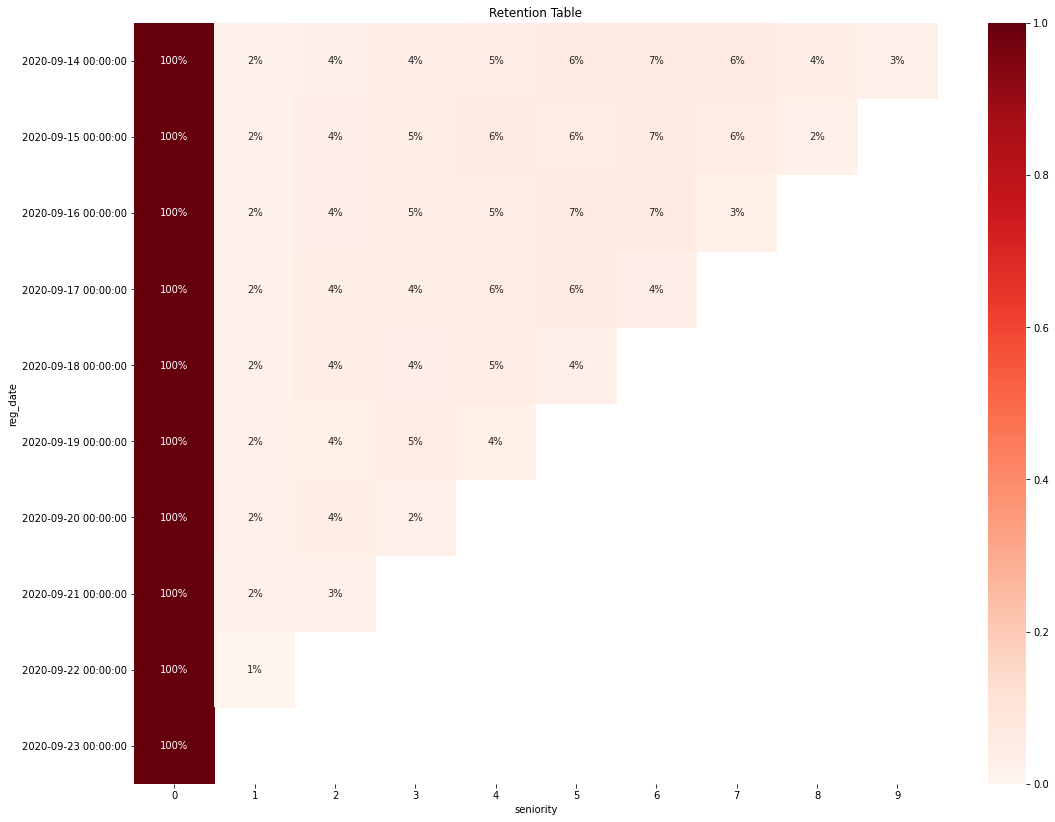

In [91]:
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()